<a href="https://www.kaggle.com/code/area41/red-wine-quality?scriptVersionId=295917052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

A qualidade de um vinho é determinada por um conjunto de características físico-químicas que interagem de forma complexa, influenciando diretamente sua aceitação sensorial. A base de dados Red Wine Quality reúne essas medições de maneira estruturada, oferecendo um excelente cenário para análises exploratórias orientadas a dados e tomada de decisão baseada em evidências.

Neste notebook, realizou-se uma análise descritiva exploratória (EDA) com ênfase no uso de tabelas dinâmicas (pivot tables) como principal ferramenta analítica. Essa abordagem permite resumir grandes volumes de dados de forma clara, comparável e interpretável, facilitando a identificação de padrões entre variáveis químicas — como pH, densidade, teor alcoólico e acidez — e os diferentes níveis de qualidade do vinho.

In [53]:
import numpy as np, pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [54]:
import pandas as pd

file_path = "/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv"
df = pd.read_csv(file_path, sep=",")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Análises Descritivas

## Média do teor alcoólico por qualidade

In [56]:
df.groupby("quality")["alcohol"].mean()

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

Quanto maior a qualidade, maior o teor alcóolico.

## Contagem de amostras por qualidade

In [57]:
# Transforma em um novo dataframe com reset no index
df.groupby("quality").size().reset_index(name='count')

,quality,count
0,3,10
1,4,53
2,5,681
3,6,638
4,7,199
5,8,18


## Média de pH, alcoohol e densidade por qualidade

In [58]:
# Média de pH, alcoohol e densidade por qualidade
df.groupby("quality")[["pH","density","alcohol"]].mean()

,pH,density,alcohol
quality,,,
3,3.398000,0.997464,9.955000
4,3.381509,0.996542,10.265094
5,3.304949,0.997104,9.899706
6,3.318072,0.996615,10.629519
7,3.290754,0.996104,11.465913
8,3.267222,0.995212,12.094444


## [Média, Desvio Padrão, Mínima e Máxima] em Alcohol

In [59]:
# Agregações múltiplas (mean, std, min, max) em alcohol
df.groupby("quality")["alcohol"].agg(["mean","std","min","max"])

,mean,std,min,max
quality,,,,
3,9.955000,0.818009,8.4,11.0
4,10.265094,0.934776,9.0,13.1
5,9.899706,0.736521,8.5,14.9
6,10.629519,1.049639,8.4,14.0
7,11.465913,0.961933,9.2,14.0
8,12.094444,1.224011,9.8,14.0


## Média e Desvio Padrão de Alcohol e Sulphates

In [60]:
# agg com nomes personalizados
named_agg = (
    df.groupby("quality")
      .agg(
          alcohol_mean=("alcohol","mean"),
          alcohol_std=("alcohol","std"),
          sulphates_mean=("sulphates", "mean"),
          sulphates_std=("sulphates","std"),
      )
)
named_agg

,alcohol_mean,alcohol_std,sulphates_mean,sulphates_std
quality,,,,
3,9.955000,0.818009,0.570000,0.122020
4,10.265094,0.934776,0.596415,0.239391
5,9.899706,0.736521,0.620969,0.171062
6,10.629519,1.049639,0.675329,0.158650
7,11.465913,0.961933,0.741256,0.135639
8,12.094444,1.224011,0.767778,0.115379


## Normalizar o teor alcoólico por qualidade (z-score por grupo)

In [61]:
# Cada valor de `alcohol` é transformado em um z-score mas calculado separadamente para cada grupo de `quality`.
df["normalized_alcohol"] = (
    df.groupby("quality")["alcohol"].transform(lambda x: (x - x.mean())/x.std())
    # df.groupby("quality")["alcohol"].transform(func_z_score)
)

df[["quality","alcohol","normalized_alcohol"]].head(10)

,quality,alcohol,normalized_alcohol
0,5,9.4,-0.678469
1,5,9.8,-0.135375
2,5,9.8,-0.135375
3,6,9.8,-0.790290
4,5,9.4,-0.678469
5,5,9.4,-0.678469
6,5,9.4,-0.678469
7,7,10.0,-1.523924
8,7,9.5,-2.043711
9,5,10.5,0.815039


##  Média de pH de cada grupo

In [62]:
# Cada linha recebe a **média de pH da sua qualidade** - Diferente de `agg`, não reduz o resultado: cada linha continua no DataFrame.
df["ph_mean_by_quality"] = (
    df.groupby("quality")["pH"].transform("mean")
)

df[["quality","pH", "ph_mean_by_quality"]].head(10)

,quality,pH,ph_mean_by_quality
0,5,3.51,3.304949
1,5,3.20,3.304949
2,5,3.26,3.304949
3,6,3.16,3.318072
4,5,3.51,3.304949
5,5,3.51,3.304949
6,5,3.30,3.304949
7,7,3.39,3.290754
8,7,3.36,3.290754
9,5,3.35,3.304949


# Tabelas Dinâmicas 

In [63]:
pd.pivot_table(
    df,
    values = "pH",
    index="quality",
    columns=pd.cut(df["alcohol"], bins = 4),
    aggfunc = "mean",
    observed=True
)

alcohol,"(8.394, 10.025]","(10.025, 11.65]","(11.65, 13.275]","(13.275, 14.9]"
quality,,,,
3,3.328333,3.502500,NaN,NaN
4,3.309286,3.451364,3.543333,NaN
5,3.286505,3.340106,3.457500,2.980000
6,3.289032,3.322484,3.357941,3.414444
7,3.194211,3.280455,3.305647,3.501429
8,3.055000,3.192500,3.276667,3.480000


### Formato Hierárquico

pd.cut() transformar dados numéricos contínuos em faixas ou categorias discretas (bins), facilitando a análise e a visualização. Ela segmenta dados, como idades em faixas etárias, permitindo definir limites exatos para os intervalos ou o número de bins de largura igual.

In [64]:
alcohol_bins = pd.cut(df["alcohol"], bins=4, labels=["muito_baixo","baixo","médio","alto"])

multi = df.groupby(["quality", alcohol_bins], observed=True).agg(
    pH_mean=("pH", "mean"),
    density_mean=("density", "mean")
)

print(multi.head(10))

                      pH_mean  density_mean
quality alcohol                            
3       muito_baixo  3.328333      0.997713
        baixo        3.502500      0.997090
4       muito_baixo  3.309286      0.997153
        baixo        3.451364      0.996024
        médio        3.543333      0.994647
5       muito_baixo  3.286505      0.997301
        baixo        3.340106      0.996826
        médio        3.457500      0.994498
        alto         2.980000      0.997600
6       muito_baixo  3.289032      0.997653


### Features classificadas em 4 categorias (Quality = Bom)

In [65]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'normalized_alcohol',
       'ph_mean_by_quality'],
      dtype='object')

In [66]:
labels_4 = ["muito_baixo", "baixo", "médio", "alto"]

df2 = pd.DataFrame()
df2["fixed_acidity"] = pd.cut(df["fixed acidity"], bins=4, labels=labels_4)
df2["volatile_acidity"] = pd.cut(df["volatile acidity"], bins=4, labels=labels_4)
df2["citric_acid"] = pd.cut(df["citric acid"], bins=4, labels=labels_4)
df2["chlorides"] = pd.cut(df["chlorides"], bins=4, labels=labels_4)
df2["free_sulfur_dioxide"] = pd.cut(df["free sulfur dioxide"], bins=4, labels=labels_4)
df2["total_sulfur_dioxide"] = pd.cut(df["total sulfur dioxide"], bins=4, labels=labels_4)
df2["density"] = pd.cut(df["density"], bins=4, labels=labels_4)
df2["pH"] = pd.cut(df["pH"], bins=4, labels=labels_4)
df2["sulphates"] = pd.cut(df["sulphates"], bins=4, labels=labels_4)
df2["alcohol"] = pd.cut(df["alcohol"], bins=4, labels=labels_4)

# dados fortemente assimétricas divide por quantis mais justo estatisticamente
df2["residual_sugar"] = pd.qcut(df["residual sugar"], q=4, labels=labels_4)

df2["quality"] = pd.cut(
    df["quality"],
    bins=[0, 4, 6, 8, 10],
    labels=["ruim", "regular", "bom", "excelente"],
    include_lowest=True
)

In [67]:
df2["quality"].cat.categories

Index(['ruim', 'regular', 'bom', 'excelente'], dtype='object')

Ao transformar variáveis contínuas em categorias e aplicar agregações estatísticas, o notebook converte dados brutos em informação acionável, reduzindo ruído e aumentando a interpretabilidade. Esse tipo de análise é especialmente valioso em contextos industriais e agrícolas, onde decisões precisam ser explicáveis, reprodutíveis e baseadas em padrões consistentes.

In [68]:
df2[df2["quality"].astype(str) == "bom"]

,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,residual_sugar,quality
7,muito_baixo,baixo,muito_baixo,muito_baixo,muito_baixo,muito_baixo,baixo,médio,muito_baixo,muito_baixo,muito_baixo,bom
8,baixo,baixo,muito_baixo,muito_baixo,muito_baixo,muito_baixo,baixo,baixo,muito_baixo,muito_baixo,baixo,bom
16,baixo,muito_baixo,médio,muito_baixo,baixo,baixo,médio,baixo,baixo,baixo,muito_baixo,bom
37,baixo,muito_baixo,baixo,muito_baixo,muito_baixo,muito_baixo,baixo,baixo,muito_baixo,muito_baixo,baixo,bom
62,baixo,baixo,muito_baixo,muito_baixo,muito_baixo,muito_baixo,baixo,médio,muito_baixo,muito_baixo,muito_baixo,bom
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,muito_baixo,muito_baixo,baixo,muito_baixo,baixo,muito_baixo,baixo,médio,baixo,baixo,baixo,bom
1544,baixo,muito_baixo,baixo,muito_baixo,muito_baixo,muito_baixo,baixo,baixo,baixo,baixo,médio,bom
1549,muito_baixo,muito_baixo,baixo,muito_baixo,muito_baixo,muito_baixo,baixo,baixo,muito_baixo,baixo,muito_baixo,bom
1555,muito_baixo,baixo,muito_baixo,muito_baixo,muito_baixo,muito_baixo,baixo,médio,muito_baixo,baixo,muito_baixo,bom


In [69]:
multi2 = df2.groupby(["quality", "citric_acid"], observed=True).agg(
    contagem=("pH", "count")
)

display(multi2)

contagem
quality citric_acid          
ruim    muito_baixo        45
        baixo              15
        médio               2
        alto                1
regular muito_baixo       703
        baixo             479
        médio             134
        alto                3
bom     muito_baixo        46
        baixo             121
        médio              48
        alto                2

In [70]:
multi2.loc['bom']

,contagem
citric_acid,
muito_baixo,46
baixo,121
médio,48
alto,2


Observa-se que Vinhos classificados como qualidade boa tem o Ácido Cítrico baixo.

In [71]:
# Exibindo quality = bom e Ácido Cítrico alto
multi2.loc["bom","alto"]

contagem    2
Name: (bom, alto), dtype: int64

In [72]:
# Combinações de categorias
multi2.loc[('bom',["baixo","médio"]),:]

contagem
quality citric_acid          
bom     baixo             121
        médio              48

In [73]:
# todos os grupos com quality=bom (corta o nível 0)
multi2.xs('bom',level=0)

,contagem
citric_acid,
muito_baixo,46
baixo,121
médio,48
alto,2


# Melt para Seaborn

In [74]:
import matplotlib.pyplot as plt, seaborn as sns

### Alcohol Boxplot

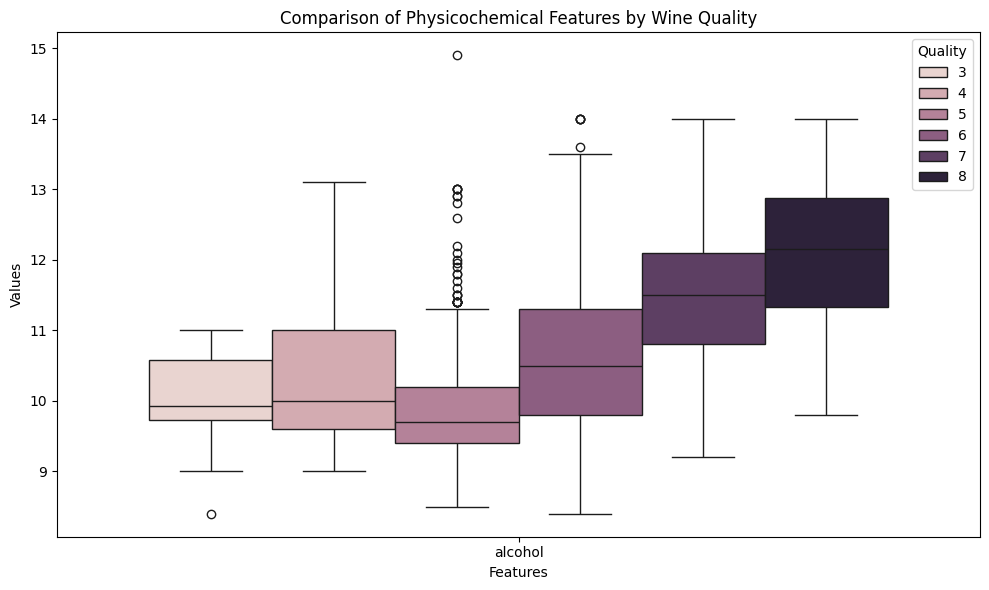

In [75]:
long_alcohol = df.melt(id_vars="quality",value_vars=["alcohol"],var_name="features",value_name="values")
plt.figure(figsize=(10, 6))
#sns.violinplot(data=long_alcohol,x="features",y="values",hue="quality",split=True)
sns.boxplot(data=long_alcohol,x="features",y="values",hue="quality")

plt.title("Comparison of Physicochemical Features by Wine Quality")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title="Quality")
plt.tight_layout()
plt.show()

### pH Boxplot

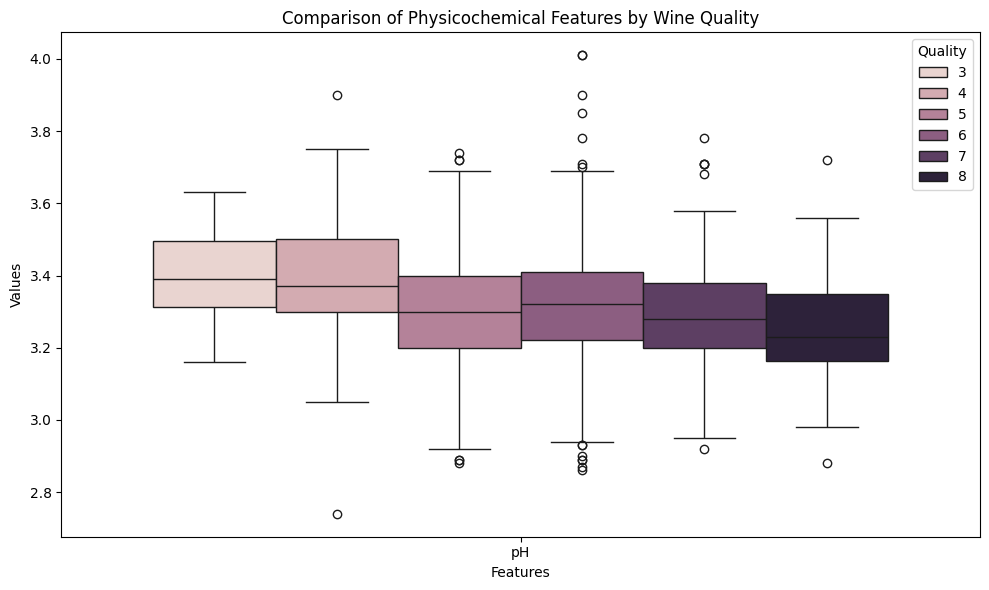

In [76]:
long_ph = df.melt(id_vars="quality",value_vars=["pH"],var_name="features",value_name="values")
plt.figure(figsize=(10, 6))

sns.boxplot(data=long_ph,x="features",y="values",hue="quality")

plt.title("Comparison of Physicochemical Features by Wine Quality")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title="Quality")
plt.tight_layout()
plt.show()

### Sulphates Boxplot

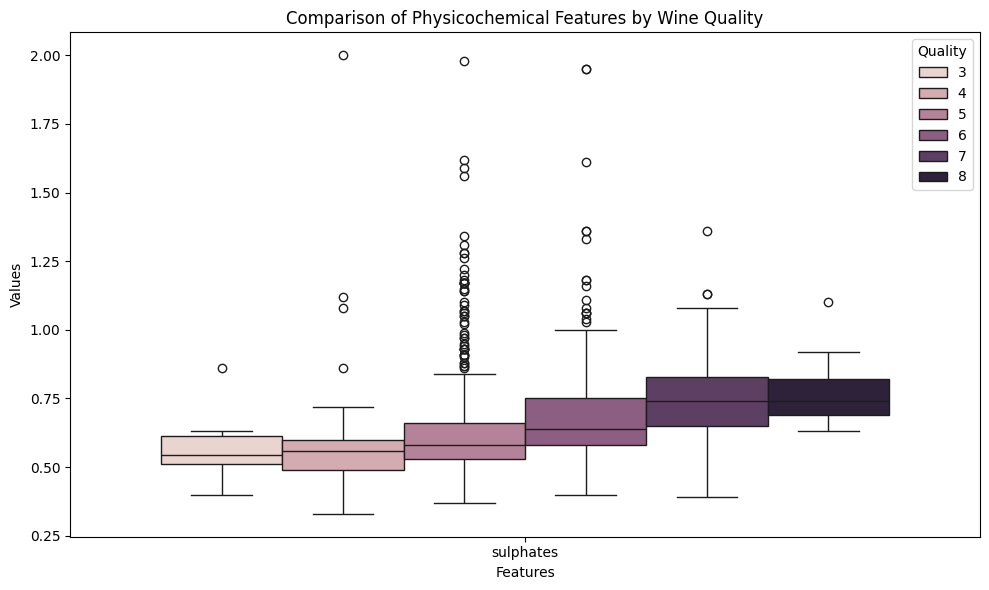

In [77]:
long_sulphates = df.melt(id_vars="quality",value_vars=["sulphates"],var_name="features",value_name="values")
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_sulphates,x="features",y="values",hue="quality")

plt.title("Comparison of Physicochemical Features by Wine Quality")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title="Quality")
plt.tight_layout()
plt.show()

### Median Comparison of Features by Wine Quality

In [83]:
long_df = df.melt(
    id_vars="quality",
    value_vars=["alcohol","pH","sulphates"],
    var_name="features",
    value_name="values"
)
long_df

,quality,features,values
0,5,alcohol,9.40
1,5,alcohol,9.80
2,5,alcohol,9.80
3,6,alcohol,9.80
4,5,alcohol,9.40
...,...,...,...
4792,5,sulphates,0.58
4793,6,sulphates,0.76
4794,6,sulphates,0.75
4795,5,sulphates,0.71


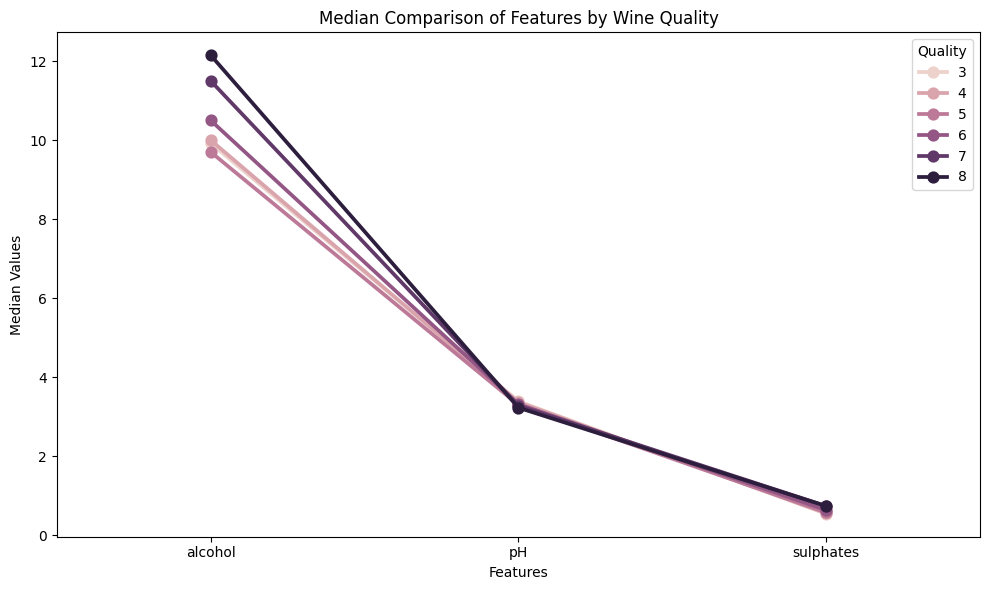

In [84]:
plt.figure(figsize=(10, 6))

sns.pointplot(
    data=long_df,
    x="features",
    y="values",
    hue="quality",
    estimator="median",
    errorbar=None
)

plt.title("Median Comparison of Features by Wine Quality")
plt.xlabel("Features")
plt.ylabel("Median Values")
plt.legend(title="Quality")
plt.tight_layout()
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler

long_df["values_scaled"] = (
    long_df
    .groupby("features")["values"]
    .transform(lambda x: StandardScaler().fit_transform(x.values.reshape(-1, 1)).ravel())
)

In [81]:
long_df["values_scaled"]

0      -0.960246
1      -0.584777
2      -0.584777
3      -0.584777
4      -0.960246
          ...   
1594    0.072294
1595    0.729364
1596    0.541630
1597   -0.209308
1598    0.541630
Name: values_scaled, Length: 1599, dtype: float64

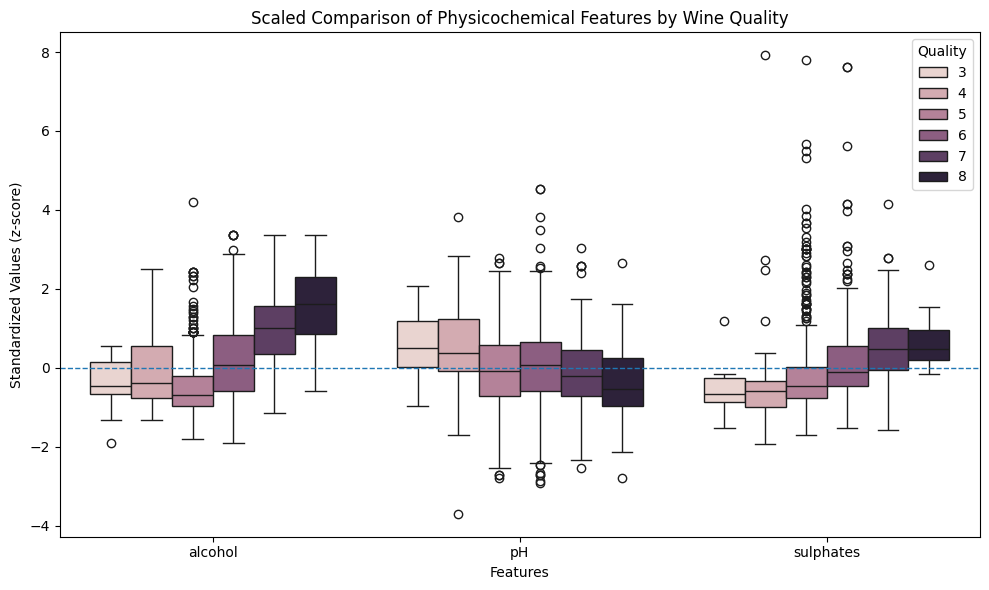

In [86]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=long_df,
    x="features",
    y="values_scaled",
    hue="quality"
)

plt.title("Scaled Comparison of Physicochemical Features by Wine Quality")
plt.xlabel("Features")
plt.ylabel("Standardized Values (z-score)")
plt.axhline(0, linestyle="--", linewidth=1)  # referência da média
plt.legend(title="Quality")
plt.tight_layout()
plt.show()